In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_rows", None)

print("setup")

setup


In [4]:
path = "/content/Thyroid_Diff.csv"

#loading the data
def load_data(path:str) -> pd.DataFrame:
  data = pd.read_csv(path)
  return data


data_frame = load_data(path)
data_frame.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


**Age:** The age of the patient at the time of diagnosis or treatment.

**Gender:** The gender of the patient (male or female).

**Smoking:** Whether the patient is a smoker or not.

**Hx Smoking:** Smoking history of the patient (e.g., whether they have ever smoked).

**Hx Radiotherapy:** History of radiotherapy treatment for any condition.

**Thyroid Function:** The status of thyroid function, possibly indicating if there are any abnormalities.

**Physical Examination:** **bold text** Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

**Adenopathy:** Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

**Pathology:** Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

**Focality:** Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

**Risk:** The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

**T:** Tumor classification based on its size and extent of invasion into nearby structures.

**N:** Nodal classification indicating the involvement of lymph nodes.

**M:** **bold text** Metastasis classification indicating the presence or absence of distant metastases.

**Stage:** The overall stage of the cancer, typically determined by combining T, N, and M classifications.

**Response: **Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

**Recurred:** Indicates whether the cancer has recurred after initial treatment.


In [5]:
def brief_analysis(data_frame):
  for column in data_frame.columns:
    print(column)
    print(data_frame[column].unique())
    print()


brief_analysis(data_frame)
data_frame.shape






Age
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]

Gender
['F' 'M']

Smoking
['No' 'Yes']

Hx Smoking
['No' 'Yes']

Hx Radiothreapy
['No' 'Yes']

Thyroid Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Physical Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Pathology
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Focality
['Uni-Focal' 'Multi-Focal']

Risk
['Low' 'Intermediate' 'High']

T
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

N
['N0' 'N1b' 'N1a']

M
['M0' 'M1']

Stage
['I' 'II' 'IVB' 'III' 'IVA']

Response
['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']

R

(383, 17)

In [6]:
#splitting the data fo recurred or not
recurred = data_frame[data_frame["Recurred"] == "Yes"]
non_recurred = data_frame[data_frame["Recurred"] == "No"]

recurred[["Age", "Gender", "Smoking", "Hx Smoking", "Recurred"]].count()  #108
non_recurred[["Age", "Gender", "Smoking", "Hx Smoking", "Recurred"]].count()  #275

Age           275
Gender        275
Smoking       275
Hx Smoking    275
Recurred      275
dtype: int64

In [8]:
#smoking gender age
recurred[["Age", "Gender", "Smoking", "Hx Smoking", "Recurred"]].head(108)
recurred[(recurred["Smoking"] == "Yes") & (recurred["Recurred"] == "Yes")].count() #only 33 people are smokers and the disease recurred 31%

#smoking is not strongly causing the recurrence only 31%
recurred[(recurred["Smoking"] == "Yes") & (recurred["Recurred"] == "Yes") & (recurred["Gender"] == "M") & (recurred["Age"] > 50)].count()

#if they are male and age above 50 , it likely occur more than below the age

Age                     18
Gender                  18
Smoking                 18
Hx Smoking              18
Hx Radiothreapy         18
Thyroid Function        18
Physical Examination    18
Adenopathy              18
Pathology               18
Focality                18
Risk                    18
T                       18
N                       18
M                       18
Stage                   18
Response                18
Recurred                18
dtype: int64

In [9]:
#risk,  thyroid function ,physical examination , Adenopathy
recurred[(recurred["Risk"] == "High") & (recurred["Recurred"] == "Yes")].count() # when risk high or medium it recured 88%

#tyroid function
#['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 #'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

recurred[(recurred["Recurred"] == "Yes") & (recurred["Thyroid Function"] == 'Subclinical Hypothyroidism' )].count() # Euthyroid affect the occurrence

#physical examination
'''
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
'''
recurred[(recurred["Recurred"] == "Yes") & (recurred["Physical Examination"] == 'Diffuse goiter' )].count()  #normal and diffuse goiter does not contribute to recurrence


#adenopathy

#['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
recurred[(recurred["Recurred"] == "Yes") & (recurred["Stage"] == 'III' )].count()

#['Indeterminate' 'Excellent' 'Structural Incomplete'
 #'Biochemical Incomplete']

recurred[(recurred["Recurred"] == "Yes")  & (recurred["Thyroid Function"] == 'Euthyroid') & (recurred["Risk"] == "High")].count()



Age                     28
Gender                  28
Smoking                 28
Hx Smoking              28
Hx Radiothreapy         28
Thyroid Function        28
Physical Examination    28
Adenopathy              28
Pathology               28
Focality                28
Risk                    28
T                       28
N                       28
M                       28
Stage                   28
Response                28
Recurred                28
dtype: int64

In [ ]:
df_train = data_frame[["Recurred",
"Physical Examination", "Adenopathy", "Risk", "Thyroid Function", "Age", "Response"]]

df_train = df_train.drop(columns=["Thyroid Function"], axis=1)

df_train


In [ ]:
# scaling and encoding the object fields
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = LabelEncoder()
encoder = OneHotEncoder(sparse_output=False)


df_train["Target"] = label.fit_transform(df_train["Recurred"])

one_hot_encoder = encoder.fit_transform(df_train["Risk"].explode().to_frame())

column_names = ["High", "Intermediate", "Low"]

one_hot_encoded_df = pd.DataFrame(one_hot_encoder, columns=column_names)

df_train= pd.concat([df_train, one_hot_encoded_df], axis=1)

df_train



In [12]:
one_hot_encoder = encoder.fit_transform(df_train["Response"].explode().to_frame())

column_names = ['Indeterminate', 'Excellent', 'Structural Incomplete' ,'Biochemical Incomplete']

one_hot_encoded_df = pd.DataFrame(one_hot_encoder, columns=column_names)

df_train= pd.concat([df_train, one_hot_encoded_df], axis=1)

df_train.head()


,Recurred,Physical Examination,Adenopathy,Risk,Age,Response,Target,High,Intermediate,Low,Indeterminate,Excellent,Structural Incomplete,Biochemical Incomplete
0,No,Single nodular goiter-left,No,Low,27,Indeterminate,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,No,Multinodular goiter,No,Low,34,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,No,Single nodular goiter-right,No,Low,30,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,No,Single nodular goiter-right,No,Low,62,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,No,Multinodular goiter,No,Low,62,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:

column_names =['Single nodular goiter-left', 'Multinodular goiter' ,'Single nodular goiter-right', 'Normal', 'Diffuse goiter']

one_hot_encoder = encoder.fit_transform(df_train["Physical Examination"].explode().to_frame())


one_hot_encoded_df = pd.DataFrame(one_hot_encoder, columns=column_names)

df_train= pd.concat([df_train, one_hot_encoded_df], axis=1)

df_train.head()

,Recurred,Physical Examination,Adenopathy,Risk,Age,Response,Target,High,Intermediate,Low,Indeterminate,Excellent,Structural Incomplete,Biochemical Incomplete,Single nodular goiter-left,Multinodular goiter,Single nodular goiter-right,Normal,Diffuse goiter
0,No,Single nodular goiter-left,No,Low,27,Indeterminate,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,No,Multinodular goiter,No,Low,34,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,No,Single nodular goiter-right,No,Low,30,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,No,Single nodular goiter-right,No,Low,62,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,No,Multinodular goiter,No,Low,62,Excellent,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
column_names = ['No' ,'Right' ,'Extensive', 'Left' ,'Bilateral', 'Posterior']

one_hot_encoder = encoder.fit_transform(df_train["Adenopathy"].explode().to_frame())


one_hot_encoded_df = pd.DataFrame(one_hot_encoder, columns=column_names)

df_train= pd.concat([df_train, one_hot_encoded_df], axis=1)

df_train.head()

,Recurred,Physical Examination,Adenopathy,Risk,Age,Response,Target,High,Intermediate,Low,...,Multinodular goiter,Single nodular goiter-right,Normal,Diffuse goiter,No,Right,Extensive,Left,Bilateral,Posterior
0,No,Single nodular goiter-left,No,Low,27,Indeterminate,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,No,Multinodular goiter,No,Low,34,Excellent,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,No,Single nodular goiter-right,No,Low,30,Excellent,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,No,Single nodular goiter-right,No,Low,62,Excellent,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,No,Multinodular goiter,No,Low,62,Excellent,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# dropping table
df_train = df_train.drop(columns=["Physical Examination", "Adenopathy", "Response", "Risk", "Recurred"], axis=1)
df_train.head()

,Age,Target,High,Intermediate,Low,Indeterminate,Excellent,Structural Incomplete,Biochemical Incomplete,Single nodular goiter-left,Multinodular goiter,Single nodular goiter-right,Normal,Diffuse goiter,No,Right,Extensive,Left,Bilateral,Posterior
0,27,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,62,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


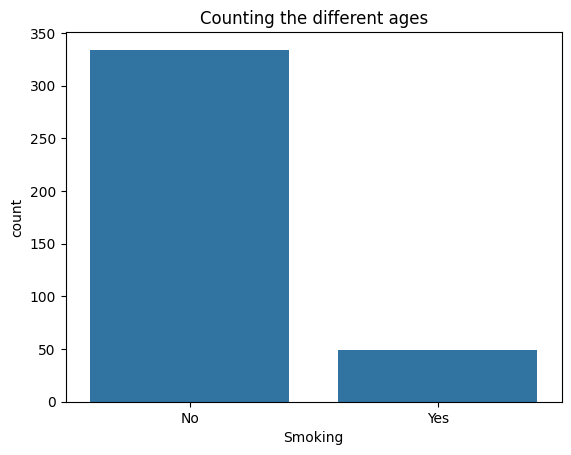

In [21]:
import matplotlib.pyplot as plt


sns.countplot(x ="Smoking", data = data_frame)
plt.title("Counting the different ages")
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df_train.drop(columns="Target", axis=1)
Y = df_train["Target"]

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2)

logistic = LogisticRegression(max_iter=300)
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.961038961038961
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.88      0.94        25

    accuracy                           0.96        77
   macro avg       0.97      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



In [25]:
random = RandomForestClassifier()

X = df_train.drop(columns="Target", axis=1)
Y = df_train["Target"]

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2)

random.fit(x_train, y_train)

y_pred = random.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.974025974025974
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.90      0.95        21

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.97        77
weighted avg       0.97      0.97      0.97        77



In [26]:
decision = DecisionTreeClassifier()

X = df_train.drop(columns="Target", axis=1)
Y = df_train["Target"]

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2)

decision.fit(x_train, y_train)

y_pred = decision.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.948051948051948
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.88      0.95      0.91        22

    accuracy                           0.95        77
   macro avg       0.93      0.95      0.94        77
weighted avg       0.95      0.95      0.95        77



In [35]:
decision = KNeighborsClassifier(n_neighbors=5)

X = df_train.drop(columns="Target", axis=1)
Y = df_train["Target"]

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2)

decision.fit(x_train, y_train)

y_pred = decision.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8961038961038961
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.85      0.65      0.73        17

    accuracy                           0.90        77
   macro avg       0.88      0.81      0.83        77
weighted avg       0.89      0.90      0.89        77



In [39]:
# testing it manually
result = y_train[:]
result = result.to_numpy()

y_result = logistic.predict(x_train[:])

count = 0
not_count = 0

for i in range(result.shape[0]):
  if result[i] == y_result[i]:
    count += 1
  else:
    not_count += 1

print(count)
print(not_count)



295
11
